In [1]:
# MNIST 예제를 구현해 보아요!
# Data는 Kaggle에서 다운로드 할꺼예요!

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')
display(df.shape)   # (42000, 785)

(42000, 785)

In [ ]:
# 데이터 전처리
# 결측치나 이상치가 존재하지 않아요!
# 단, 정규화는 필요해요!

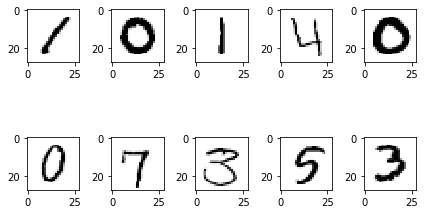

In [2]:
# 이미지 확인
figure = plt.figure()
ax_arr = []  # python list

img_data = df.drop('label', axis=1, inplace=False).values

for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28), 
                     cmap='Greys',            # 흑백이미지 표현
                     interpolation='nearest') # 보간법

plt.tight_layout()
plt.show()

In [3]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])
# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)


In [4]:
## Tensorflow Implementation ##
sess = tf.Session()

onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]))
b = tf.Variable(tf.random.normal([10]))

# Hypothesis, Model
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# session, 초기화
sess.run(tf.global_variables_initializer())

# 반복학습
num_of_epoch = 1000
batch_size = 100

for step in range(num_of_epoch):
    
    total_batch = int(norm_train_x_data.shape[0] / batch_size)

    for i in range(total_batch):
        batch_x = norm_train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y = onehot_train_t_data[i*batch_size:(i+1)*batch_size]
        
        _, loss_val = sess.run([train, loss], feed_dict={X:batch_x,
                                                         T:batch_y})
    if step % 100 == 0:
        print('loss val : {}'.format(loss_val))





loss val : 1.5307165384292603
loss val : 0.20722626149654388
loss val : 0.17508423328399658
loss val : 0.17157819867134094
loss val : 0.17306602001190186
loss val : 0.17516613006591797
loss val : 0.1768408566713333
loss val : 0.17799437046051025
loss val : 0.17876680195331573
loss val : 0.17928001284599304


In [5]:
# accuracy 측정

predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:norm_test_x_data,
                                             T:onehot_test_t_data})
print('Accuracy : {}'.format(accuracy_val))  # 0.9077777862548828

Accuracy : 0.9077777862548828


In [4]:
import tensorflow as tf

print(tf.__version__)   # 2.3.0

W = tf.random.normal([1], dtype=tf.float32)

# 1.15버전에서 W의 값을 알아내려면 session을 통해서 node를 실행시켜서
# 값을 얻어야 해요!
# 2.x 버전은 eager execution(즉시실행모드)을 지원해요.
# session이 필요가 없고 일반적인 프로그래밍 하는 것처럼 사용할 수 있어요!
print(W.numpy())   # [-0.7210334]

# 추가적으로 초기화 하는 코드 역시 불필요해서 이제는 사용하지 않아요!
# sess.run(tf.gloabal_variables_initializer())  # 사용하지 않아요!

# placeholder도 역시 삭제되었어요!

2.3.0
[1.1614635]


In [6]:
# 그러면 Keras를 사용한다고 하는데..
# 코드는 어떻게 작성하는 건가요??

# 그림과 매칭해서 봐야 해요!!

# keras의 model은 어떻게 만드나요?
import tensorflow as tf

model = tf.keras.models.Sequential()

# model.add()를 이용해서 layer를 추가해 줘요!
# model.add('input layer')
# model.add('output layter')

# loss의 종류와 optimizer종류를 설정
# model.compile()

# 학습 (마치 sklearn 사용하는 것처럼..)
# model.fit()

# 평가와 predict
# model.evaluate()  => 모델평가
# model.predict()   => 예측값 도출

# 모델 저장
# model.save()


In [7]:
%reset
# 대표적인 multinomial 예제인 MNIST를 이용해서 
# Tensorflow 2.x 버전으로 구현해 보아요!

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential  # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(Input Layer)
                                                    # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading

df = pd.read_csv('./data/mnist/train.csv')
display(df.head())

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])
# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [12]:
# Tensorflow 2.x 구현

# model 생성
model = Sequential()

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))
# input layer는 사실 하는일 없어요! 그래서 코드를 나눠쓰지 않고 한번에
# 기술할 수 도 있어요! (나중에 해요~)

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# model compile
# 사용할 loss 함수를 지정, 사용한 optimizer(알고리즘)를 지정
from tensorflow.keras.optimizers import SGD

# loss
# linear regression : linear
# binary classification : binary_crossentropy
# multinomial classification : categorical_crossentropy(onehot encoding처리를 해야 해요!)
# multinomial classification : sparse_categorical_crossentropy(onehot처리가 필요 없어요!)

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
236/236 [==============================] - 1s 2ms/step - loss: 2.2969 - accuracy: 0.1436 - val_loss: 2.1717 - val_accuracy: 0.2175
Epoch 2/100
236/236 [==============================] - 0s 1ms/step - loss: 2.0554 - accuracy: 0.3230 - val_loss: 1.9593 - val_accuracy: 0.3974
Epoch 3/100
236/236 [==============================] - 0s 1ms/step - loss: 1.8638 - accuracy: 0.4791 - val_loss: 1.7846 - val_accuracy: 0.5272
Epoch 4/100
236/236 [==============================] - 0s 1ms/step - loss: 1.7049 - accuracy: 0.5807 - val_loss: 1.6387 - val_accuracy: 0.6097
Epoch 5/100
236/236 [==============================] - 0s 1ms/step - loss: 1.5723 - accuracy: 0.6435 - val_loss: 1.5168 - val_accuracy: 0.6633
Epoch 6/100
236/236 [==============================] - 0s 1ms/step - loss: 1.4611 - accuracy: 0.6860 - val_loss: 1.4142 - val_accuracy: 0.7007
Epoch 7/100
236/236 [==============================] - 0s 1ms/step - loss: 1.3673 - accuracy: 0.7163 - val_loss: 1.3276 - val_accuracy: 0.7259

236/236 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.8668 - val_loss: 0.5564 - val_accuracy: 0.8662
Epoch 57/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.8673 - val_loss: 0.5532 - val_accuracy: 0.8668
Epoch 58/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5484 - accuracy: 0.8681 - val_loss: 0.5501 - val_accuracy: 0.8673
Epoch 59/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.8687 - val_loss: 0.5471 - val_accuracy: 0.8677
Epoch 60/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.8692 - val_loss: 0.5441 - val_accuracy: 0.8679
Epoch 61/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.8691 - val_loss: 0.5413 - val_accuracy: 0.8679
Epoch 62/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.8699 - val_loss: 0.5385 - val_accuracy: 0.8684
Epoch

In [16]:
print(model.evaluate(norm_test_x_data, test_t_data))
#        loss               accuracy
# [0.4799305200576782, 0.876031756401062]

394/394 [==============================] - 0s 660us/step - loss: 0.4799 - accuracy: 0.8760
[0.4799305200576782, 0.876031756401062]


In [ ]:
# 이렇게 만든 모델을 저장해 보아요!
# 학습 한 후 모델이 메모리에 저장되 있어요. 프로그램 종료하면 다 날라가요!
# 내일 다시 하려면 처음부터 다시 학습해야해요! => 시간이 오래 걸려요!

# 모델학습에 시간이 너무 오래걸리는 경우
# 중간에 미리 저장해 놓으면 거기서부터 재 학습이 가능!

# 다른사람과 모델 공유가 가능!

# 저장을 할 때 2가지 방법이 있어요!
# 모델을 저장할 때 모델 구조와 계산된 W,b를 같이 저장할 수 있어요!
# 장점 => 편해요!  단점 => 사이즈 커요!

# 모델을 저장할 때 모델 구조는 저장하지 않고 W,b만 저장
# 장점 => 크기가 작아요. 단점 => 사용하려면 모델을 먼저 만들고 W,b를 로딩.



In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential  # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(Input Layer)
                                                    # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 
# 사용했어요!
# 이제는 test_x_data, test_t_data 이 두 데이터를 test 용도로 사용할꺼예요!
# 최종 모델 성능평가를 위해서 딱 1번만 사용할꺼예요!
# 그러면 validation은 어떻게 하나요?
# keras는 학습할 때 train data를 일정부분 나누어서 자체 validation이 가능
# keras 기능을 이용해서 validation 처리

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# 우리는 loss 지정할 때 sparse_categorical_crossentropy로 loss함수를
# 지정할 예정이기 때문에 label에 대한 one-hot encoding처리가 필요 없어요!

# model 생성
model = Sequential()

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model의 저장할려고 해요. model 구조 빼고 checkpoint기능을 이용해서 
# weight, b만 저장
# 어디에 저장할지를 알려줘야 해요!
checkpoint_path = './training_ckpt/cp.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path)  # 실제 경로로 만들어요!
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)


# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[cp_callback])

# 우리 모델에 대한 최종 평가진행
print(model.evaluate(norm_test_x_data, test_t_data))
#        loss               accuracy
# [0.4799305200576782, 0.876031756401062]

Epoch 1/100
198/236 [========================>.....] - ETA: 0s - loss: 2.3729 - accuracy: 0.1219WARNING:tensorflow:Callbacks method `on_test_batch_begin` is slow compared to the batch time (batch time: 0.0000s vs `on_test_batch_begin` time: 0.0010s). Check your callbacks.

Epoch 00001: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 1s 2ms/step - loss: 2.3526 - accuracy: 0.1324 - val_loss: 2.2146 - val_accuracy: 0.2031
Epoch 2/100
202/236 [========================>.....] - ETA: 0s - loss: 2.1257 - accuracy: 0.2803
Epoch 00002: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 2.1125 - accuracy: 0.2918 - val_loss: 2.0027 - val_accuracy: 0.3891
Epoch 3/100
196/236 [=======================>......] - ETA: 0s - loss: 1.9353 - accuracy: 0.4347
Epoch 00003: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 1.9177 - accuracy: 0.4491 - val_loss: 1.8255 - v

Epoch 30/100
195/236 [=======================>......] - ETA: 0s - loss: 0.7067 - accuracy: 0.8435
Epoch 00030: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.8420 - val_loss: 0.7036 - val_accuracy: 0.8440
Epoch 31/100
218/236 [==========================>...] - ETA: 0s - loss: 0.6994 - accuracy: 0.8442
Epoch 00031: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.8434 - val_loss: 0.6943 - val_accuracy: 0.8447
Epoch 32/100
191/236 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.8454
Epoch 00032: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.8452 - val_loss: 0.6854 - val_accuracy: 0.8459
Epoch 33/100
201/236 [========================>.....] - ETA: 0s - loss: 0.6828 - accuracy: 0.8465
Epoch 00033: saving model to ./training_ckpt\cp.ckpt
236

214/236 [==========================>...] - ETA: 0s - loss: 0.5477 - accuracy: 0.8664
Epoch 00059: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8658 - val_loss: 0.5481 - val_accuracy: 0.8679
Epoch 60/100
228/236 [===========================>..] - ETA: 0s - loss: 0.5443 - accuracy: 0.8665
Epoch 00060: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.8662 - val_loss: 0.5451 - val_accuracy: 0.8687
Epoch 61/100
201/236 [========================>.....] - ETA: 0s - loss: 0.5417 - accuracy: 0.8665
Epoch 00061: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8668 - val_loss: 0.5422 - val_accuracy: 0.8692
Epoch 62/100
211/236 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.8671 ETA: 0s - loss: 0.5466 - accuracy: 0.
Epoch 00062: saving model to ./

Epoch 88/100
198/236 [========================>.....] - ETA: 0s - loss: 0.4793 - accuracy: 0.8789
Epoch 00088: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.8776 - val_loss: 0.4853 - val_accuracy: 0.8769
Epoch 89/100
229/236 [============================>.] - ETA: 0s - loss: 0.4803 - accuracy: 0.8782
Epoch 00089: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.8781 - val_loss: 0.4838 - val_accuracy: 0.8767
Epoch 90/100
234/236 [============================>.] - ETA: 0s - loss: 0.4792 - accuracy: 0.8783
Epoch 00090: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8783 - val_loss: 0.4823 - val_accuracy: 0.8767
Epoch 91/100
236/236 [==============================] - ETA: 0s - loss: 0.4775 - accuracy: 0.8784
Epoch 00091: saving model to ./training_ckpt\cp.ckpt
236

In [20]:
%reset
# 아하 ... 이렇게 저장할 수 있네요!!
# 불러서 다시 사용하려면 어떻게 해야 하나요?

# 확인하기 위해...
# 일단 학습하지 않은 상태로 evaluation을 진행하면 당연히 평가결과가 
# 좋지 않겠죠??? 이거 확인하고
# 그 다음에 ckeckpoint 파일을 로드해서 model을 재 설정하고 평가를 진행
# 좋게 나오겠네요!!
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential  # keras model
from tensorflow.keras.layers import Flatten, Dense  # Flatten(Input Layer)
                                                    # Dense(Output Layer)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 
# 사용했어요!
# 이제는 test_x_data, test_t_data 이 두 데이터를 test 용도로 사용할꺼예요!
# 최종 모델 성능평가를 위해서 딱 1번만 사용할꺼예요!
# 그러면 validation은 어떻게 하나요?
# keras는 학습할 때 train data를 일정부분 나누어서 자체 validation이 가능
# keras 기능을 이용해서 validation 처리

train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# 우리는 loss 지정할 때 sparse_categorical_crossentropy로 loss함수를
# 지정할 예정이기 때문에 label에 대한 one-hot encoding처리가 필요 없어요!

# model 생성
model = Sequential()

# layer 추가
# input layer
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))

# output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 원래는 학습을 진행행해야 해요! 그런데 학습을 안할꺼예요!

# 학습을 진행하지 않고 최종 평가진행
print(model.evaluate(norm_test_x_data, test_t_data))
#        loss               accuracy
# [2.4244349002838135, 0.08492063730955124]
# 당연히 학습이 안된 모델이기 때문에 이렇게 나오는게 정상

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
394/394 [==============================] - 0s 665us/step - loss: 2.4074 - accuracy: 0.1291
[2.4074270725250244, 0.12912698090076447]


In [21]:
# 이번에는 checkpoint 파일에 있는 weight를 load한 후
# evaluation 시켜보아요!

checkpoint_path = './training_ckpt/cp.ckpt'
model.load_weights(checkpoint_path)
print(model.evaluate(norm_test_x_data, test_t_data))
# [0.48125016689300537, 0.8734920620918274]

394/394 [==============================] - 0s 827us/step - loss: 0.4813 - accuracy: 0.8735
[0.48125016689300537, 0.8734920620918274]
